In [1]:
# !pip install --upgrade tensorflow
import tensorflow as tf

In [ ]:
# #uncomment this cell when you are on COLAB
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import sys
sys.path.insert(1,'/wsu/home/gy/gy40/gy4065/hm.jetscapeml.source')
sys.path.insert(1,'/content/drive/My Drive/Projects/110_JetscapeMl/hm.jetscapeml.source')
sys.path.insert(1,'/content/drive/MyDrive/Projects/110_JetscapeMl/hm.jetscapeml.source')
sys.path.insert(1,'/g/My Drive/Projects/110_JetscapeMl/hm.jetscapeml.source')
sys.path.insert(1,'G:\\My Drive\\Projects\\110_JetscapeMl\\hm.jetscapeml.source')

In [3]:
from jet_ml_dataset_builder.jet_ml_dataset_builder_utilities import set_directory_paths
dataset_directory_path, simulation_directory_path = set_directory_paths()
from jet_ml_dataset_builder.jet_ml_dataset_builder_utilities import get_labels_str
label_str_dict=get_labels_str()


########################################################################
Checking the running platforms and setting the directory path

Python version: 3.11.5
OS: Windows
OS version: 10
running on Colab: False
Dataset Directory Path: D:\Projects\110_JetscapeMl\hm.jetscapeml.data\
Simulation Results Path: D:\Projects\110_JetscapeMl\hm.jetscapeml.data\simulation_results\
########################################################################

Aggregatring all parameters values
label_items:
 {'y_class_label_items': ['MMAT', 'MLBT'], 'alpha_s_items': [0.2, 0.3, 0.4], 'q0_items': [1.5, 2.0, 2.5]}
Building required params for the loading the dataset file
labels_str:
 {'class_labels_str': 'MMAT_MLBT', 'alpha_s_items_str': '0.2_0.3_0.4', 'q0_items_str': '1.5_2.0_2.5'}


In [4]:
from jet_ml_dataset_builder.jet_ml_dataset_builder_utilities import get_dataset
dataset_size=1000
dataset_x, dataset_y=get_dataset(dataset_size,label_str_dict, dataset_directory_path)
from jet_ml_models.pointnet import preprocess_dataset
(dataset_x, dataset_y)=preprocess_dataset(dataset_x, dataset_y,is_one_hot_encoded=False,working_column=1,scale_x=True)

Loading the whole dataset
dataset.x: <class 'numpy.ndarray'> 1024000 (1000, 32, 32)
dataset.y: <class 'numpy.ndarray'> 3000 (1000, 3)
dataset.x: <class 'numpy.ndarray'> 1024000 (1000, 32, 32)
dataset.y: <class 'numpy.ndarray'> 3000 (1000, 3)
dataset.y(working_column) sample [['MLBT' '0.4' '2.5']
 ['MLBT' '0.4' '2.5']
 ['MLBT' '0.2' '2.5']
 ['MMAT' '0.4' '1']
 ['MMAT' '0.4' '1']
 ['MMAT' '0.3' '1']
 ['MMAT' '0.4' '1']
 ['MMAT' '0.3' '1']
 ['MLBT' '0.4' '2.5']
 ['MLBT' '0.4' '2.0']]
Pre-processing
Scaling the datset_x each image between 0 and 1
dataset_x_points shape: (1000, 1024, 3)
deleting the original dataset_x after preprocess ...
Extract the working column#1 for classification
Preprocess dataset_y
Encoding to sparse categorical variable
dataset_y_encoded:
 [2 2 0 2 2 1 2 1 2 2]
dataset_y_encoded shape: (1000,)
deleting the original dataset_x after preprocess ...


In [5]:
from jet_ml_models.pointnet import prepare_datasets
from jet_ml_models.pointnet import augment
# Prepare datasets for training
train_dataset, validation_dataset,test_dataset = prepare_datasets(dataset_x, dataset_y, random_state=42,test_size=0.1, validation_size=None, augment=augment, batch_size=32)

Splitting dataset_x,dataset_y
deleting the original dataset_x,dataset_y after splitting ...
x_train: <class 'numpy.ndarray'> 2764800 (900, 1024, 3)
y_train: <class 'numpy.ndarray'> 900 (900,)
x_test: <class 'numpy.ndarray'> 307200 (100, 1024, 3)
y_test: <class 'numpy.ndarray'> 100 (100,)
y_test[:10]:
 [2 0 1 2 1 2 1 2 0 2]



In [6]:
print(len(train_dataset))
print(len(validation_dataset))
print(len(test_dataset))

29
4
4


In [7]:
from jet_ml_dataset_builder.jet_ml_dataset_builder_utilities import generate_simulation_path
# monitor = 'val_accuracy'  # 'val_accuracy' or 'val_loss'
monitor="val_sparse_categorical_accuracy"

n_epochs = 100

classifying_parameter="alpha_s"
n_epochs = 5
fold = 1

current_simulation_path = generate_simulation_path(simulation_directory_path, classifying_parameter,label_str_dict, dataset_size, n_epochs, fold)
print("current_simulation_path:",current_simulation_path)

# Use ModelCheckpoint callback to save the best model
best_model_file_path = f'{current_simulation_path}_best_model.keras'
print("best_model_file_path:",best_model_file_path)

simulation_directory_path: D:\Projects\110_JetscapeMl\hm.jetscapeml.data\simulation_results\
simulation_path: D:\Projects\110_JetscapeMl\hm.jetscapeml.data\simulation_results\jetml_pointnet_classification_alpha_s_0.2_0.3_0.4
current_simulation_path: D:\Projects\110_JetscapeMl\hm.jetscapeml.data\simulation_results\jetml_pointnet_classification_alpha_s_0.2_0.3_0.4_size_1000_epochs_5_fold_1
best_model_file_path: D:\Projects\110_JetscapeMl\hm.jetscapeml.data\simulation_results\jetml_pointnet_classification_alpha_s_0.2_0.3_0.4_size_1000_epochs_5_fold_1_best_model.keras


In [8]:
from jet_ml_models.pointnet import build_pointnet_classifier_model
NUM_POINTS = 1024
#because alpha_s can get 3 values
NUM_CLASSES = 3
activation="softmax"
# activation="sigmoid"
pointnet=build_pointnet_classifier_model(NUM_POINTS=NUM_POINTS,NUM_CLASSES=NUM_CLASSES, activation=activation)

from jet_ml_models.pointnet import compile_pointnet_classifier_model_with_hyperparam

learning_rate=0.001
loss='sparse_categorical_crossentropy'
# loss='categorical_crossentropy',
metrics='sparse_categorical_accuracy'
# metrics=['accuracy'],
pointnet=compile_pointnet_classifier_model_with_hyperparam(pointnet,learning_rate=learning_rate, loss=loss,metrics=metrics)

# from jet_ml_models.pointnet import print_model_summary
# print_model_summary(pointnet)

In [9]:
# %%timeit -n1 -r1
from jet_ml_models.pointnet import train_model_with_callbacks
monitor='val_sparse_categorical_accuracy'
with tf.device('/GPU:0'):
  model, history, train_time=train_model_with_callbacks(
    pointnet, 
    train_dataset=train_dataset, 
    validation_dataset=validation_dataset,
    monitor=monitor, best_model_file_path=best_model_file_path, n_epochs=n_epochs
    )

Epoch 1/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 51.1818 - sparse_categorical_accuracy: 0.3679
Epoch 1: val_sparse_categorical_accuracy improved from -inf to 0.43000, saving model to D:\Projects\110_JetscapeMl\hm.jetscapeml.data\simulation_results\jetml_pointnet_classification_alpha_s_0.2_0.3_0.4_size_1000_epochs_5_fold_1_best_model.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - loss: 50.8921 - sparse_categorical_accuracy: 0.3676 - val_loss: 235313856.0000 - val_sparse_categorical_accuracy: 0.4300
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 35.7431 - sparse_categorical_accuracy: 0.3557
Epoch 2: val_sparse_categorical_accuracy did not improve from 0.43000
29/29 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - loss: 35.7367 - sparse_categorical_accuracy: 0.3555 - val_loss: 1043268096.0000 - val_sparse_categorical_accuracy: 0.4300
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 35.5171 - sparse_categorical_accuracy: 0.3591
Epoch 3: val_sparse_categorical_accuracy did not impr

2.998205844561259
<Functional name=pointnet, built=True>
{'loss': [42.48896789550781, 35.55317306518555, 35.38069534301758, 35.409114837646484, 35.21794891357422], 'sparse_categorical_accuracy': [0.3588888943195343, 0.35111111402511597, 0.3522222340106964, 0.3611111044883728, 0.371111124753952], 'val_loss': [235313856.0, 1043268096.0, 2758112000.0, 33425936384.0, 10831150080.0], 'val_sparse_categorical_accuracy': [0.4300000071525574, 0.4300000071525574, 0.36000001430511475, 0.4300000071525574, 0.4300000071525574]}
D:\Projects\110_JetscapeMl\hm.jetscapeml.data\simulation_results\jetml_pointnet_classification_alpha_s_0.2_0.3_0.4_size_1000_epochs_5_fold_1_training_history.json
D:\Projects\110_JetscapeMl\hm.jetscapeml.data\simulation_results\jetml_pointnet_classification_alpha_s_0.2_0.3_0.4_size_1000_epochs_5_fold_1_training_history.csv
D:\Projects\110_JetscapeMl\hm.jetscapeml.data\simulation_results\jetml_pointnet_classification_alpha_s_0.2_0.3_0.4_size_1000_epochs_5_fold_1_training_histo

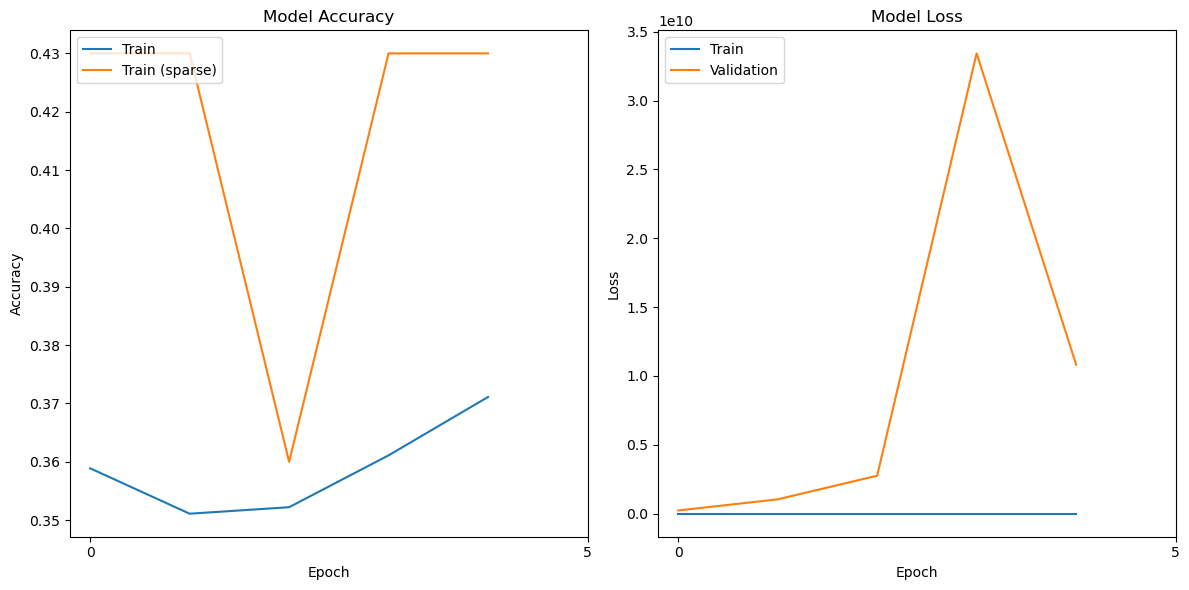

D:\Projects\110_JetscapeMl\hm.jetscapeml.data\simulation_results\jetml_pointnet_classification_alpha_s_0.2_0.3_0.4_size_1000_epochs_5_fold_1_accuracy_loss.png


In [10]:
print(train_time)
print(model)
print(history.history)

from jet_ml_models.pointnet import save_training_history
training_history_file_path_json,training_history_file_path_csv,training_history_file_path_csv = \
  save_training_history(history,current_simulation_path)

from jet_ml_models.pointnet import plot_training_history
plot_training_history_path=plot_training_history(history,current_simulation_path)
print(plot_training_history_path)

In [11]:
from jet_ml_models.pointnet import evaluate_model
accuracy, confusion_matrix = evaluate_model(model,test_dataset=test_dataset)

from jet_ml_models.pointnet import save_kfold_results
results_kfold = []
results_kfold.append({
                  'Dataset Size': dataset_size,
                  'Classifier': model.name,
                  'Fold Number': fold,
                  'Accuracy': accuracy,
                  'Confusion Matrix': confusion_matrix,
                  'Train Time': train_time,
                  'Loss/Accuracy Plot Path': plot_training_history_path,
                  'Best Model Path': best_model_file_path
              })
save_kfold_results(results_kfold, current_simulation_path)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 316ms/step
Accuracy: 0.43
Confusion Matrix: [[ 0  0 21]
 [ 0  0 36]
 [ 0  0 43]]
   Dataset Size Classifier  Fold Number  Accuracy  \
0          1000   pointnet            1      0.43   

                       Confusion Matrix  Train Time  \
0  [[0, 0, 21], [0, 0, 36], [0, 0, 43]]    2.998206   

                             Loss/Accuracy Plot Path  \
0  D:\Projects\110_JetscapeMl\hm.jetscapeml.data\...   

                                     Best Model Path  
0  D:\Projects\110_JetscapeMl\hm.jetscapeml.data\...  


,Dataset Size,Classifier,Fold Number,Accuracy,Confusion Matrix,Train Time,Loss/Accuracy Plot Path,Best Model Path
0,1000,pointnet,1,0.43,"[[0, 0, 21], [0, 0, 36], [0, 0, 43]]",2.998206,D:\Projects\110_JetscapeMl\hm.jetscapeml.data\...,D:\Projects\110_JetscapeMl\hm.jetscapeml.data\...


In [ ]:
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(pointnet,{
    'learning_rate':[0.01,0.001,0.0001],
    'epochs':[10]
}, return_train_score=False)
clf.fit(train_dataset,validation_dataset)